In [2]:
import json
import os
import matplotlib.pyplot as plt

def get_data(PA, models, *, label = "class"):
    data = {}
    for pa in PA:
        data[pa] = {}
        for model in models:
            path = f"../data/{label}/result-{pa}/{model}/single_class.json"
            if not os.path.exists(path):
                continue

            raw_result = json.load(open(path))
            result = {}
            for record in raw_result:
                k = record["task_id"]
                if not result.get(k):
                    result[k] = [0, 0]
                if record["compile_errors"] == 0 and record["can_replace"] and not record["has_todo"]:
                    result[k][0] += 1
                result[k][1] += 1
            data[pa][model] = { k: v[0] / v[1] for k, v in result.items() }
    return data

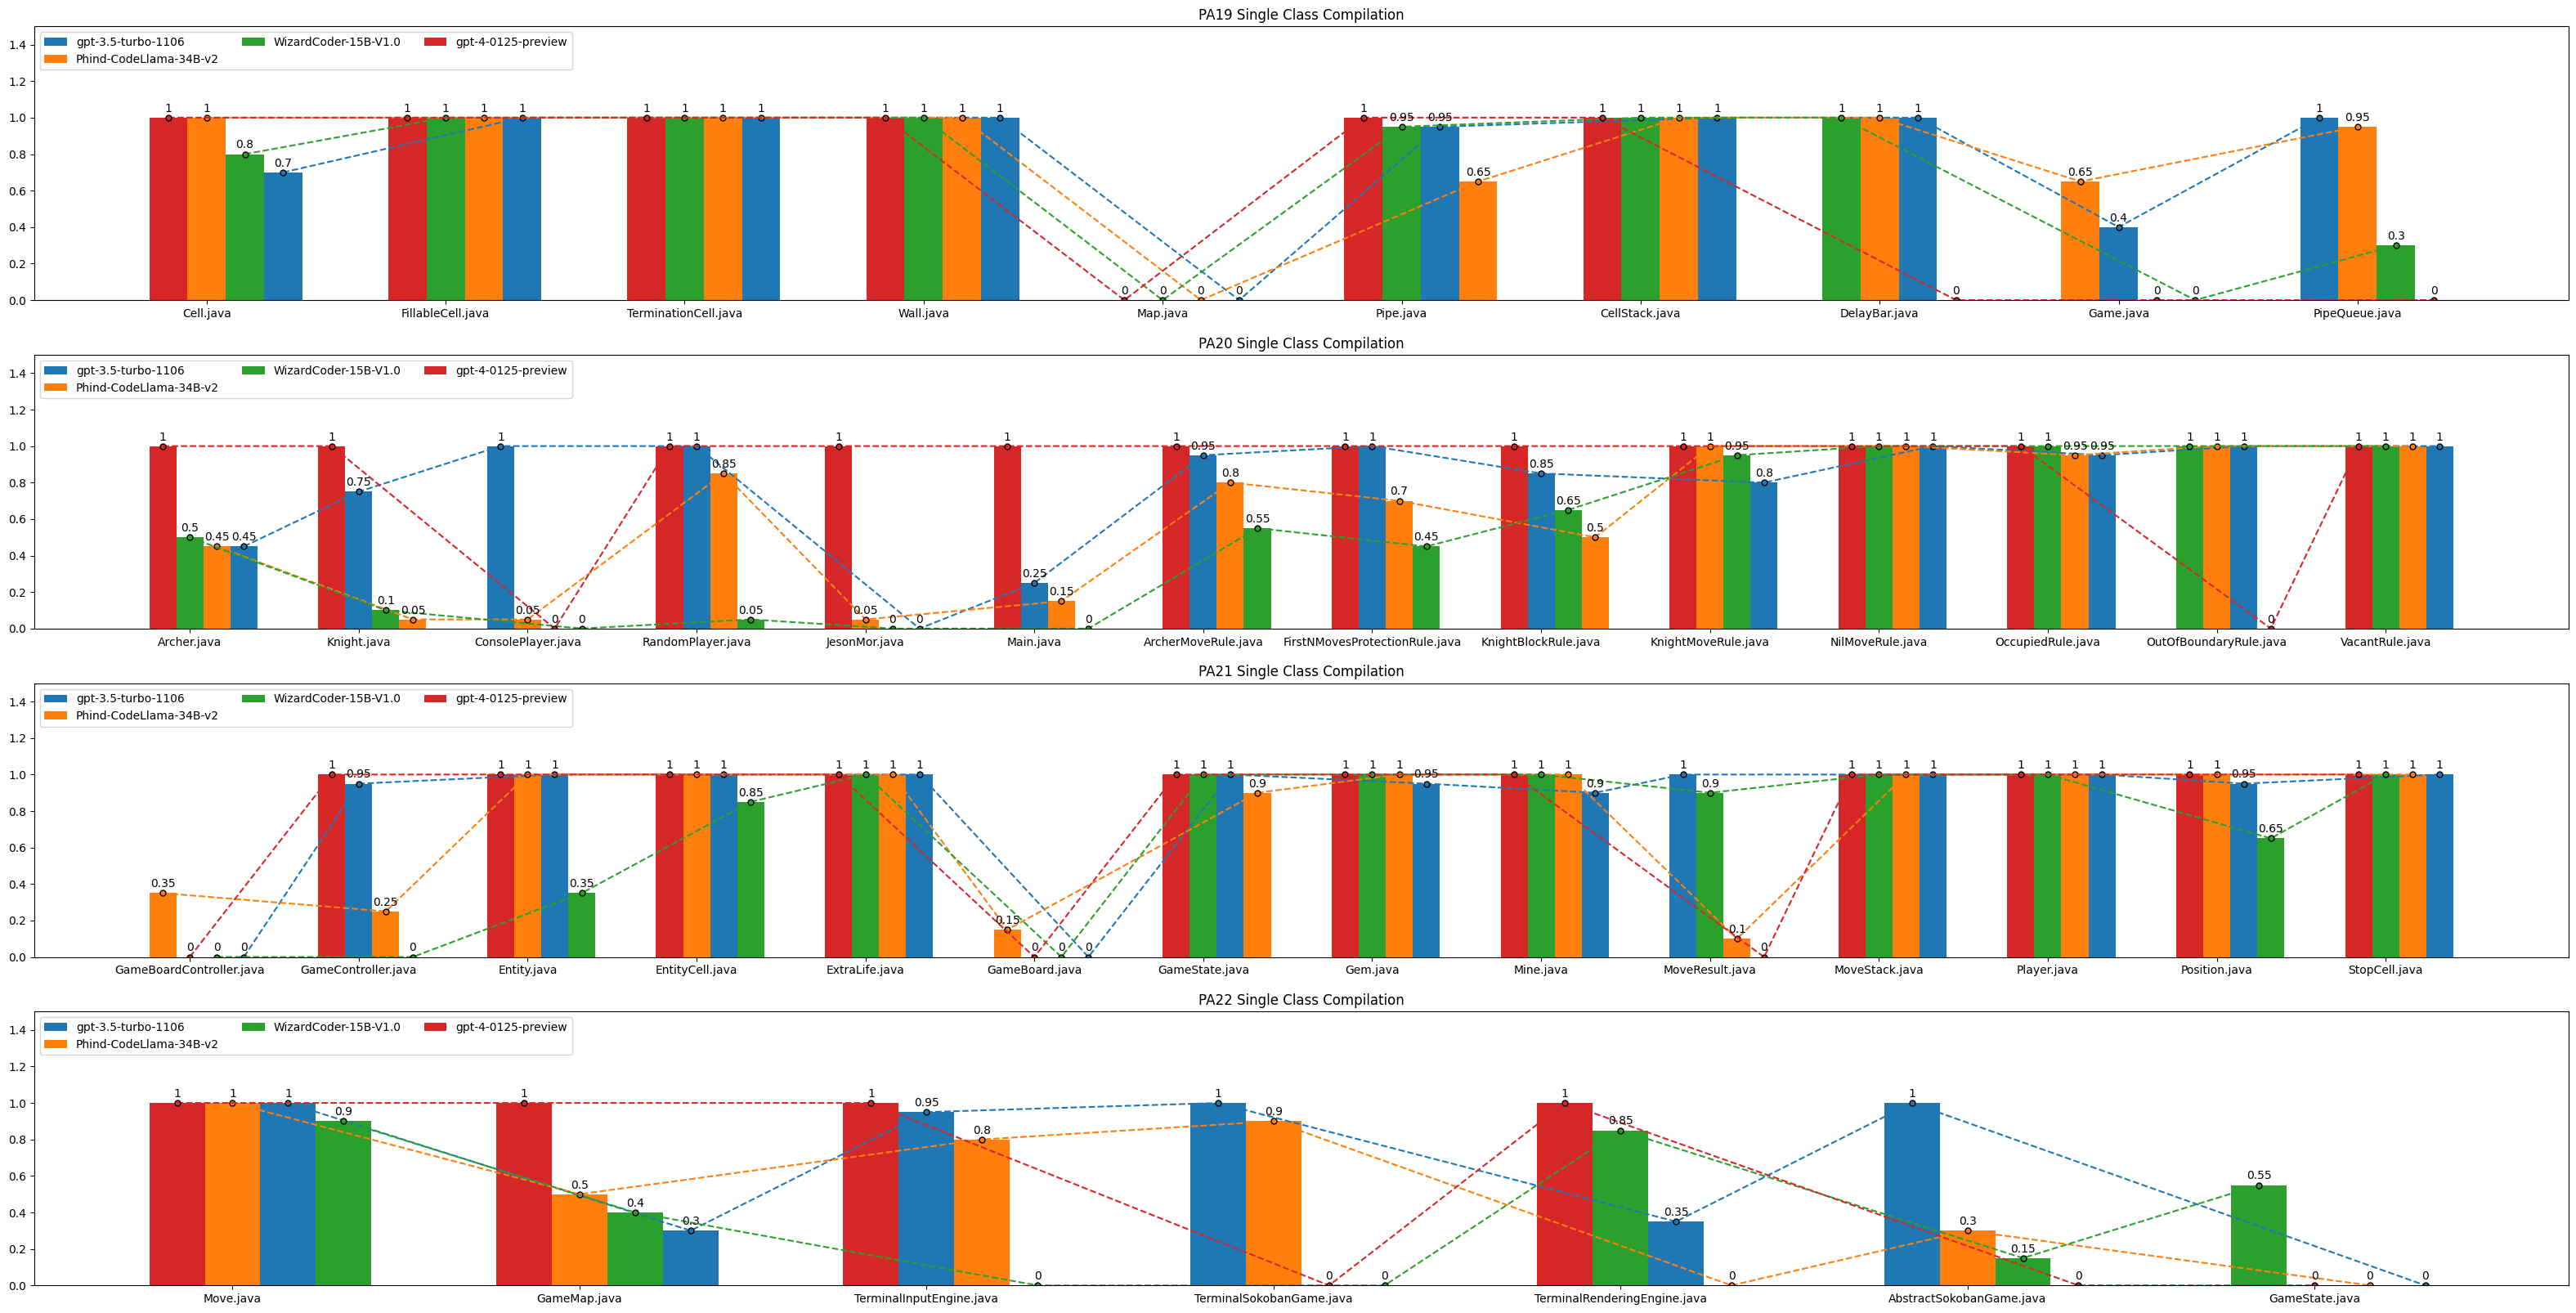

In [2]:
# class PA19/20/21/22

from single_class import sorted_multiple_columns_bar

PA = ["PA19", "PA20", "PA21", "PA22"]
models = [
    "gpt-3.5-turbo-1106",
    "Phind-CodeLlama-34B-v2",
    "WizardCoder-15B-V1.0",
    "gpt-4-0125-preview",
    # "vicuna-13B-V1.5",
    # "deepseek-coder-33b-instruct",
    # "WizardCoder-1B-V1.0",
]

data = get_data(PA, models)
_, ax = plt.subplots(len(PA), 1, figsize=(40, 5 * len(PA)))
for index, (pa, data) in enumerate(data.items()):
    sorted_multiple_columns_bar(ax[index], data, title=f"{pa} Single Class Compilation", draw_lines=True)

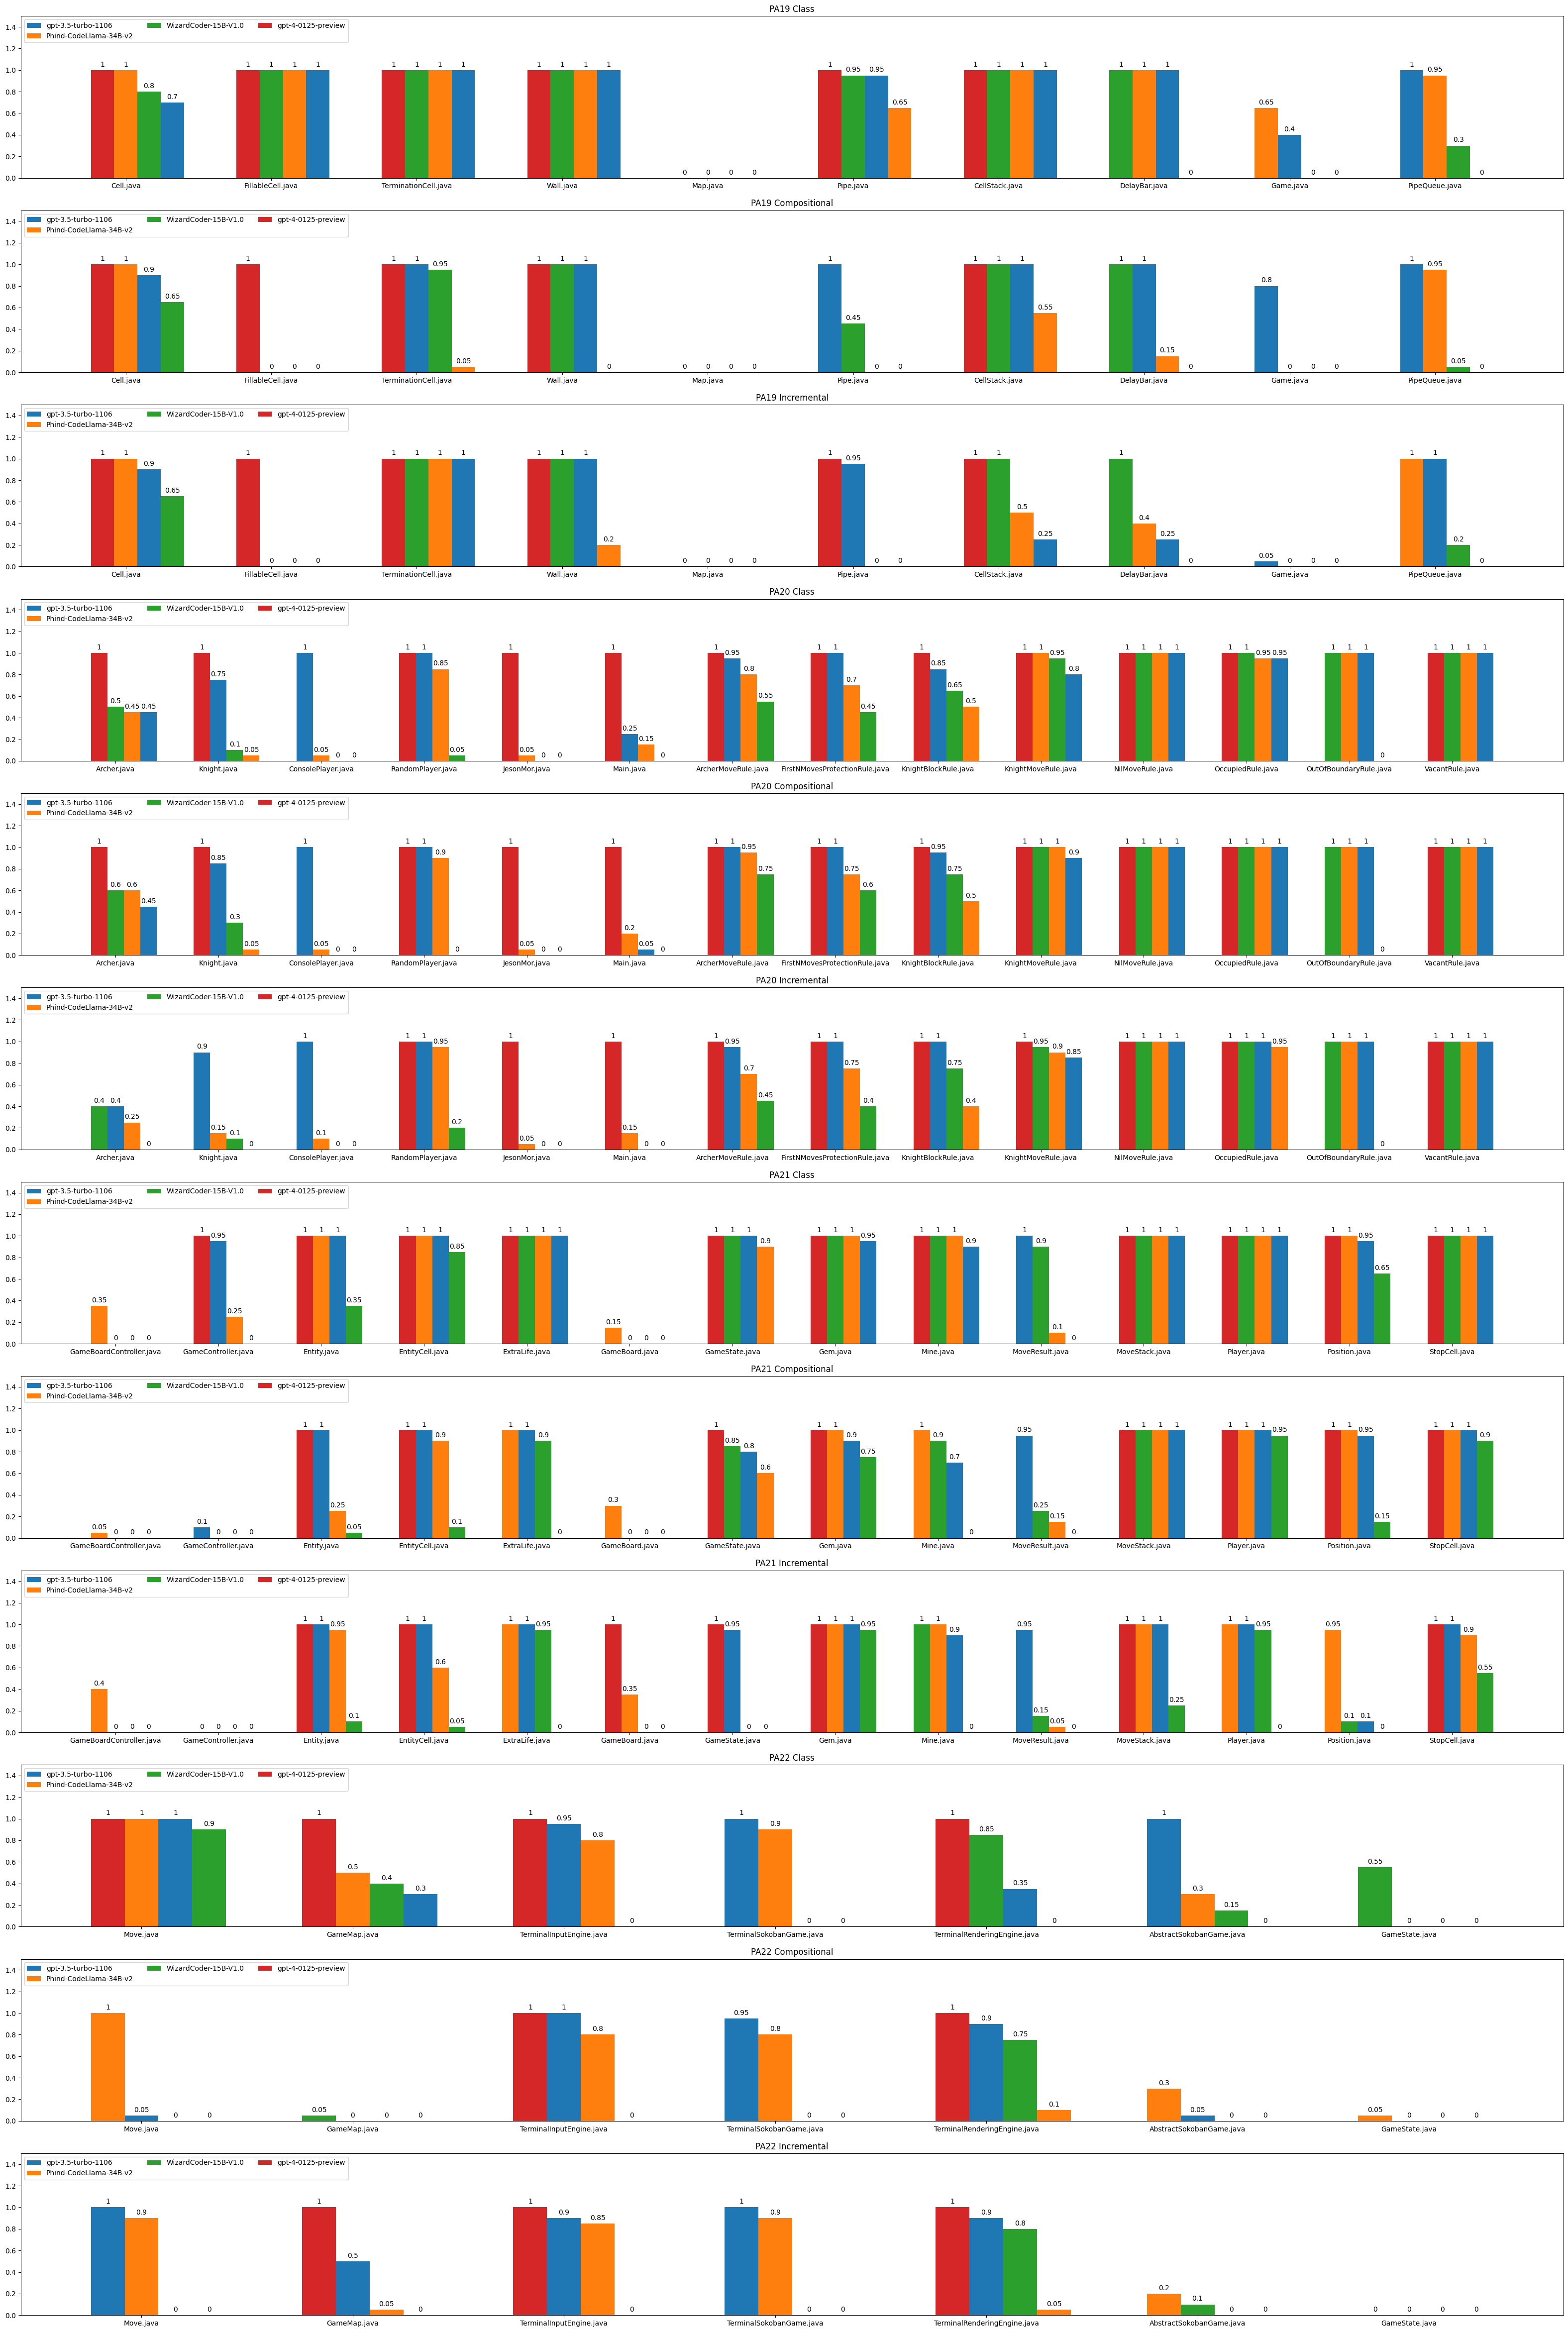

In [6]:
# class/compositional/incremental

from single_class import sorted_multiple_columns_bar

PA = ["PA19", "PA20", "PA21", "PA22"]
models = [
    "gpt-3.5-turbo-1106",
    "Phind-CodeLlama-34B-v2",
    "WizardCoder-15B-V1.0",
    "gpt-4-0125-preview",
    # "vicuna-13B-V1.5",
    # "deepseek-coder-33b-instruct",
    # "WizardCoder-1B-V1.0",
]
_, ax = plt.subplots(3 * len(PA), 1, figsize=(40, 5 * 3 * len(PA)))

normal_data = get_data(PA, models, label="class")
compositional_data = get_data(PA, models, label="compositional")
incremental_data = get_data(PA, models, label="incremental")
for index, pa in enumerate(PA):
    sorted_multiple_columns_bar(ax[index * 3 + 0], normal_data[pa], title=f"{pa} Class")
    sorted_multiple_columns_bar(ax[index * 3 + 1], compositional_data[pa], title=f"{pa} Compositional")
    sorted_multiple_columns_bar(ax[index * 3 + 2], incremental_data[pa], title=f"{pa} Incremental")


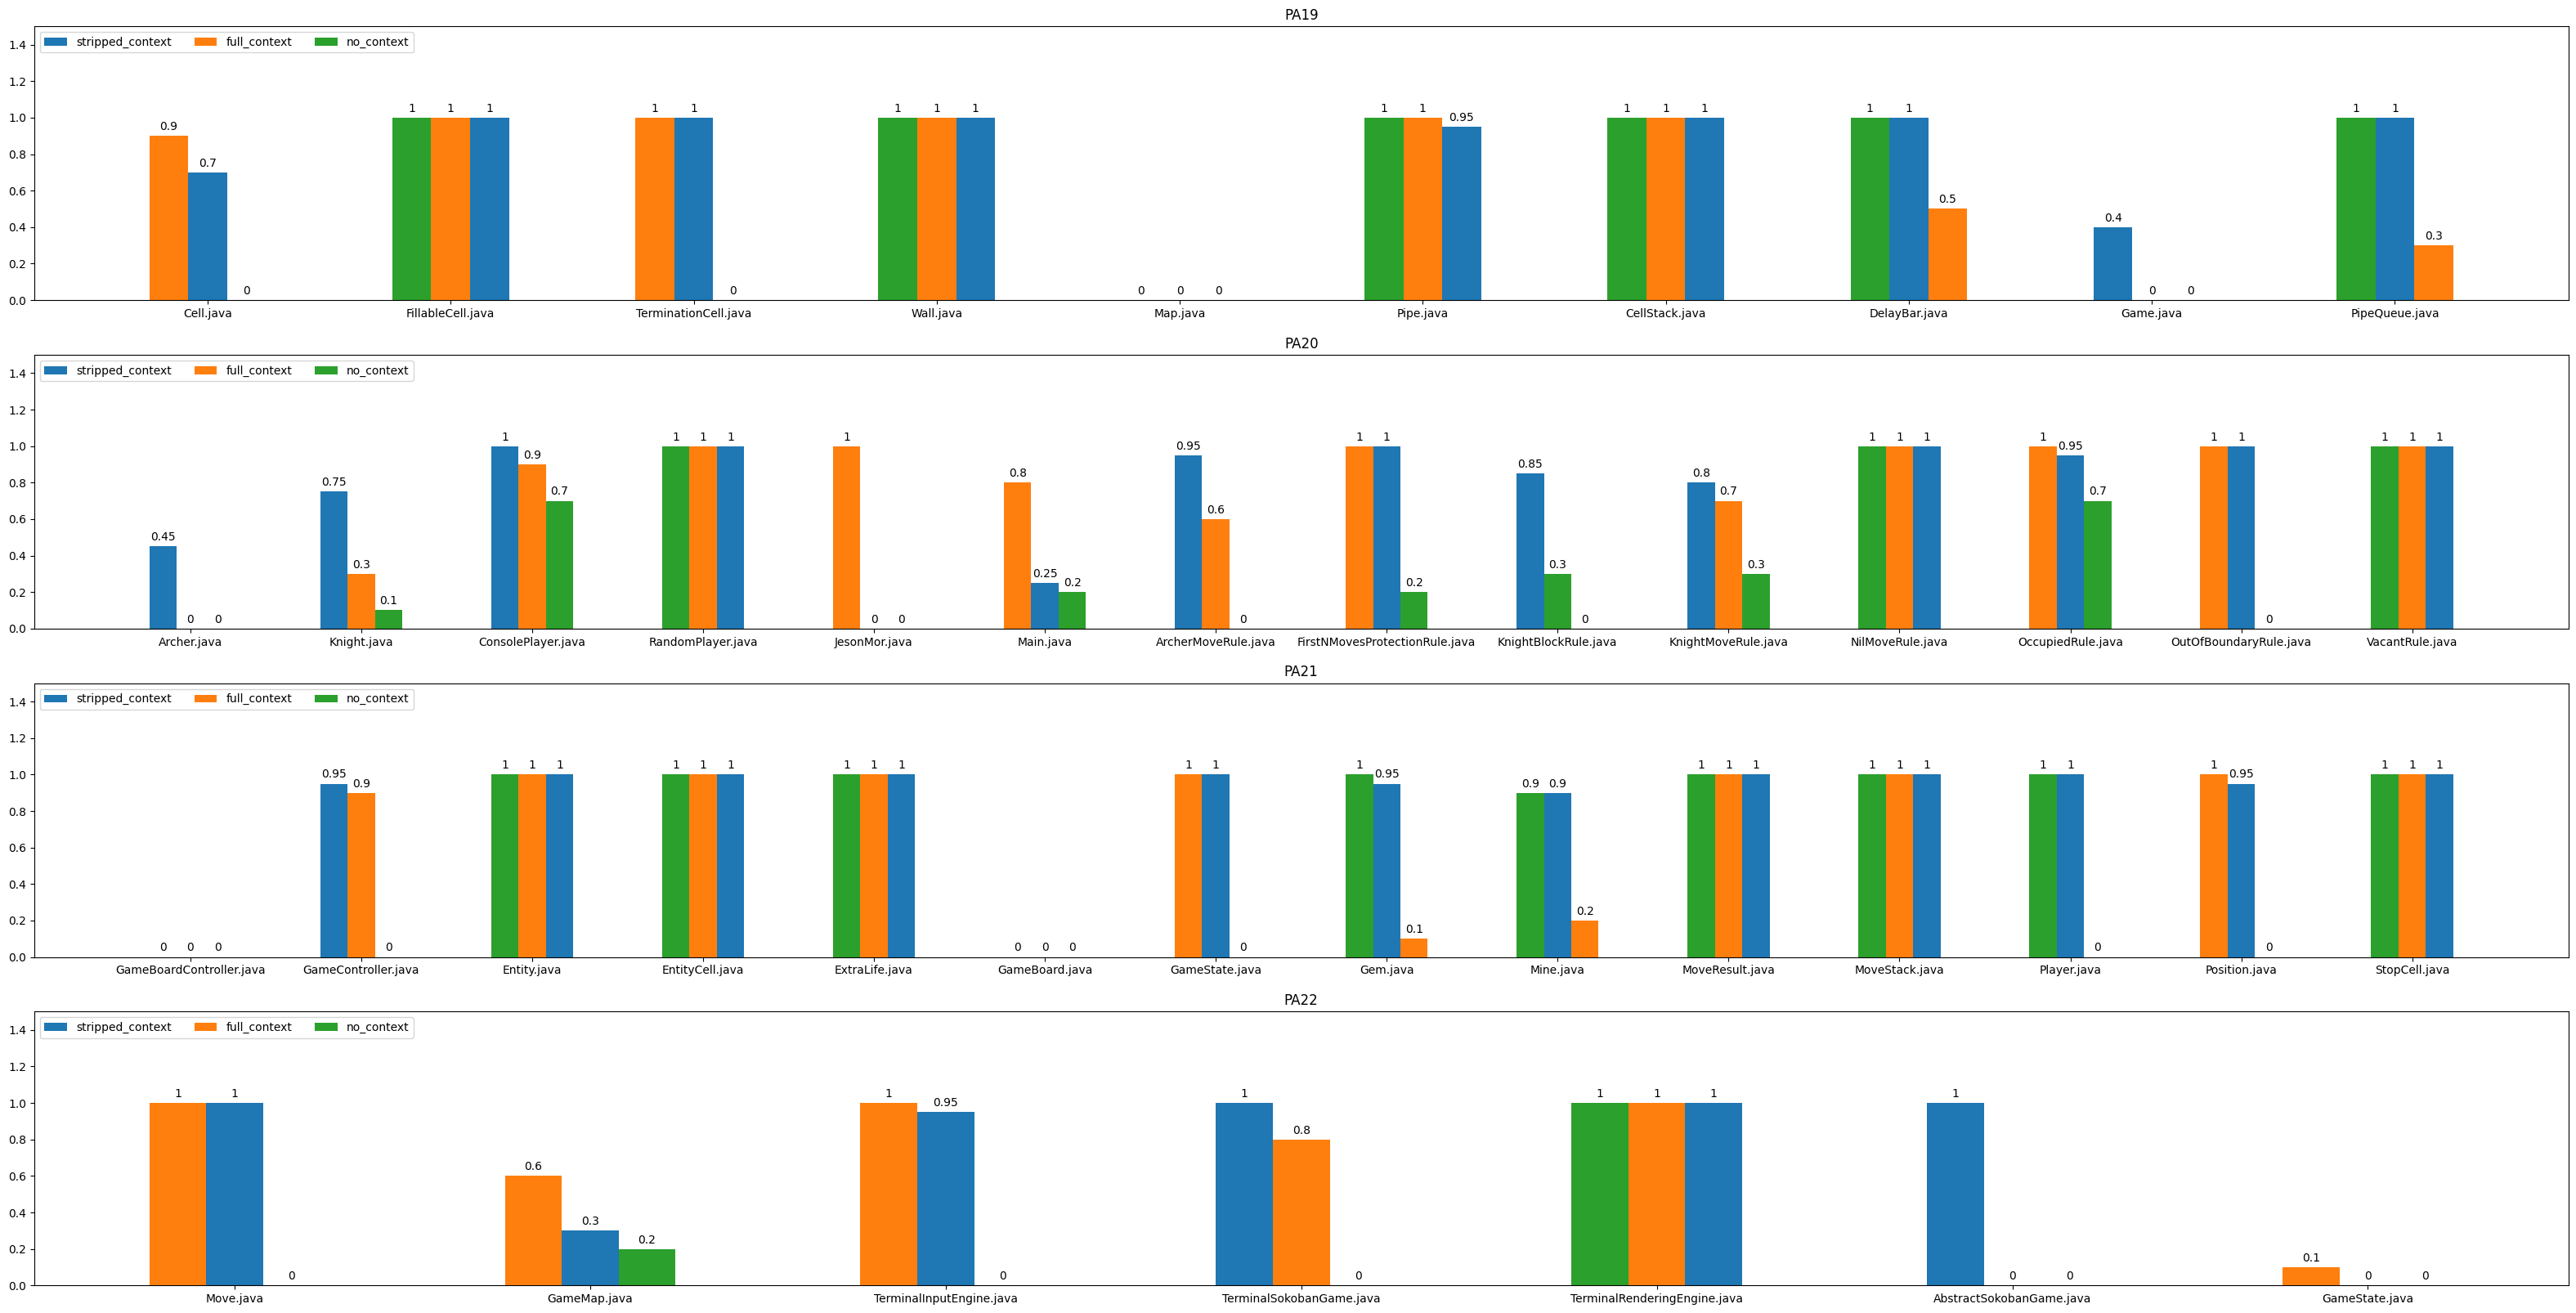

In [5]:
# stripped-context/full-context/no-context

from single_class import sorted_multiple_columns_bar

PA = ["PA19", "PA20", "PA21", "PA22"]
models = ["gpt-3.5-turbo-1106"]

_, ax = plt.subplots(len(PA), 1, figsize=(40, 5 * len(PA)))

stripped_context_data = get_data(PA, models, label="class")
full_context_data = get_data(PA, models, label="class-full-context")
no_context_data = get_data(PA, models, label="class-no-context")
data = {
    pa: {
        "stripped_context": stripped_context_data[pa][models[0]],
        "full_context": full_context_data[pa][models[0]],
        "no_context": no_context_data[pa][models[0]],
    }
    for pa in PA
}

for index, pa in enumerate(PA):
    sorted_multiple_columns_bar(ax[index], data[pa], title=f"{pa}")

In [7]:
# // prompt TODO

from single_class import sorted_multiple_columns_bar

PA = ["PA19", "PA20", "PA21", "PA22"]
models = ["gpt-3.5-turbo-1106"]

_, ax = plt.subplots(len(PA), 1, figsize=(40, 5 * len(PA)))

no_todo_data = get_data(PA, models, label="compositional")
todo_data = get_data(PA, models, label="compositional-prompt-todo")
data = {
    pa: {
        "no todo": no_todo_data[pa][models[0]],
        "with todo": todo_data[pa][models[0]],
    }
    for pa in PA
}

for index, pa in enumerate(PA):
    sorted_multiple_columns_bar(ax[index], data[pa], title=f"{pa}")